## Data Cleaning

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('datasets/Retail_Store.csv' , encoding='latin-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [ ]:
df()

In [4]:
# Finding number of columns and rows
print("The Original Dataset contains", df.shape[1],"Columns and",df.shape[0],"Rows.")

The Original Dataset contains 53 Columns and 180519 Rows.


Checking for missing values in the columns

In [9]:
def col_missing_values(df):
    for i in df.columns:
        if df[i].isna().sum()>0:
            print("Column",i,"is missing",str(df[i].isna().sum()),"values.")

col_missing_values(df)

Column Customer Lname is missing 8 values.
Column Customer Zipcode is missing 3 values.
Column Order Zipcode is missing 155679 values.
Column Product Description is missing 180519 values.


Checking for duplicate Rows and Columns

In [22]:
duplicate_rows_df = df[df.duplicated()]

print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

Number of duplicate rows:  0


In [21]:
# Check for columns with identical values
duplicated_columns = df.T.duplicated()

# Display names of duplicated columns
duplicate_columns = df.columns[duplicated_columns].tolist()
print("Duplicate columns (with different names):", duplicate_columns)

Duplicate columns (with different names): ['Customer Password', 'Order Customer Id', 'Order Item Total', 'Order Profit Per Order', 'Product Card Id', 'Product Category Id', 'Product Price']


From the codes above, we have decided to drop:
* duplicate columns 
* columns with missing values (names, zipcodes and product description)
* other unimportant columns

In [23]:
df = df.drop(columns=['Customer Lname','Customer Zipcode','Order Zipcode','Product Description',
                      'Customer Password','Order Customer Id','Order Item Total','Order Profit Per Order',
                      'Product Card Id','Product Category Id','Product Price','Customer Fname',
                      'Product Description','Customer Email','Product Image','Product Status',
                      'Order Id','Order Item Id','Order Item Cardprod Id'])

In [25]:
# Dropped 18 Columns
df.shape

(180519, 35)

### Converting and Filtering of Data

Next, we use Pandas to convert the DateOrders column to Datetime format.
* Creates 3 more columns

In [27]:
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

print(df[['order_date', 'year', 'month']].head())

           order_date  year  month
0 2018-01-31 22:56:00  2018      1
1 2018-01-13 12:27:00  2018      1
2 2018-01-13 12:06:00  2018      1
3 2018-01-13 11:45:00  2018      1
4 2018-01-13 11:24:00  2018      1


In [30]:
# To see what Order Status and Years are available.
print(df['Order Status'].unique())
print(df['year'].unique())
print(df['order_date'])

['COMPLETE' 'PENDING' 'CLOSED' 'PENDING_PAYMENT' 'CANCELED' 'PROCESSING'
 'SUSPECTED_FRAUD' 'ON_HOLD' 'PAYMENT_REVIEW']
[2018 2016 2015 2017]
0        2018-01-31 22:56:00
1        2018-01-13 12:27:00
2        2018-01-13 12:06:00
3        2018-01-13 11:45:00
4        2018-01-13 11:24:00
                 ...        
180514   2016-01-16 03:40:00
180515   2016-01-16 01:34:00
180516   2016-01-15 21:00:00
180517   2016-01-15 20:18:00
180518   2016-01-15 18:54:00
Name: order_date, Length: 180519, dtype: datetime64[ns]


In [33]:
# Exclude rows where the year is 2018
df_filtered = df[df['order_date'].dt.year != 2018]

In [35]:
# Further filter to include only 'CLOSED' and 'COMPLETED' in 'Order Status'
df_filtered = df_filtered[df_filtered['Order Status'].isin(['CLOSED', 'COMPLETED'])]

In [39]:
# Original Dataset contains 53 Columns and 180519 Rows.
# Replacing the original df with the filtered version df_filtered
df = df_filtered
df.shape

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Sales,Order Region,Order State,Order Status,Product Name,shipping date (DateOrders),Shipping Mode,order_date,year,month
1174,CASH,2,1,78.660004,262.200012,Late delivery,1,73,Sporting Goods,Caguas,...,327.75,Southeast Asia,Yakarta,CLOSED,Smart watch,12/6/2017 14:37,First Class,2017-12-04 14:37:00,2017,12
1177,CASH,3,4,109.669998,324.470001,Advance shipping,0,73,Sporting Goods,Tampa,...,327.75,Southeast Asia,Yakarta,CLOSED,Smart watch,12/7/2017 13:34,Standard Class,2017-12-04 13:34:00,2017,12
1188,CASH,2,2,136.509995,278.589996,Shipping on time,0,73,Sporting Goods,Irvington,...,327.75,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 9:43,Second Class,2017-12-04 09:43:00,2017,12
1191,CASH,2,1,23.650000,268.760010,Late delivery,1,73,Sporting Goods,Gardena,...,327.75,Southeast Asia,Rangún,CLOSED,Smart watch,12/6/2017 8:39,First Class,2017-12-04 08:39:00,2017,12
1198,CASH,2,4,31.459999,314.640015,Advance shipping,0,73,Sporting Goods,Ontario,...,327.75,Southeast Asia,Capital Nacional,CLOSED,Smart watch,12/6/2017 6:12,Standard Class,2017-12-04 06:12:00,2017,12


In [ ]:
# Create a csv with cleaned data
df.to_csv('Retail_Store_Cleaned.csv', index=False)

Now we can use the cleaned dataset!

In [5]:
df = pd.read_csv('datasets/Retail_Store_Cleaned.csv')

## Visualisations

Using a heatmap to get an visualise the relationships between 2 different features after cleaning and filtering the data

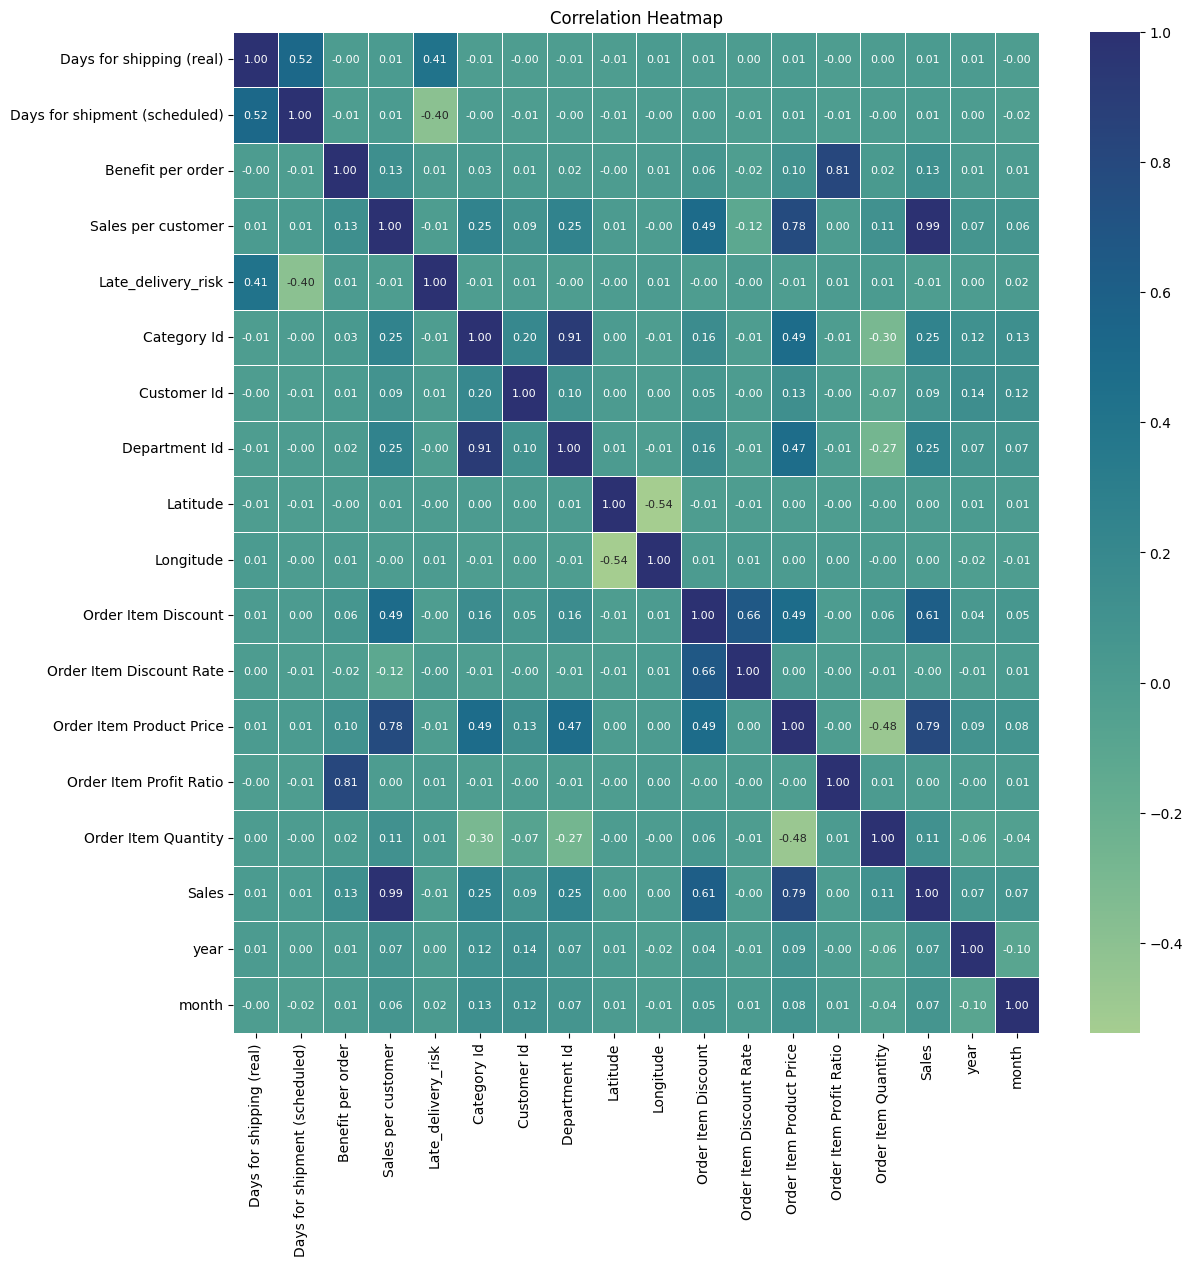

In [3]:
# Numeric_only=True, as .corr() can only take float or int 
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(13, 13))  
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', linewidths=0.5,annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

### Some Insights from Heatmap:
* Days for Shipping (real) & Days for Shipping (scheduled) (0.52):
Moderate positive correlation, scheduled shipping times moderately predict actual shipping times, but delays do occur.
* Late Delivery Risk & Days for Shipping (real) (-0.41):
Late delivery risk decreases as actual shipping days increase, suggests longer shipping durations may reduce the risk of late deliveries.
* Year/Month with Business Metrics (~0.01 to 0.14):
Little correlation between time-related variables (year, month) and most variables, suggests sales and discounts are not heavily influenced by time trends in this dataset.

In [6]:
# Calculating revenue manually: Revenue = Price * Quantity
df['Revenue'] = df['Order Item Product Price'] * df['Order Item Quantity']
annual_revenue = df.groupby('year')['Revenue'].sum()
print(annual_revenue)

year
2015    1.402915e+06
2016    1.314538e+06
2017    1.267870e+06
Name: Revenue, dtype: float64


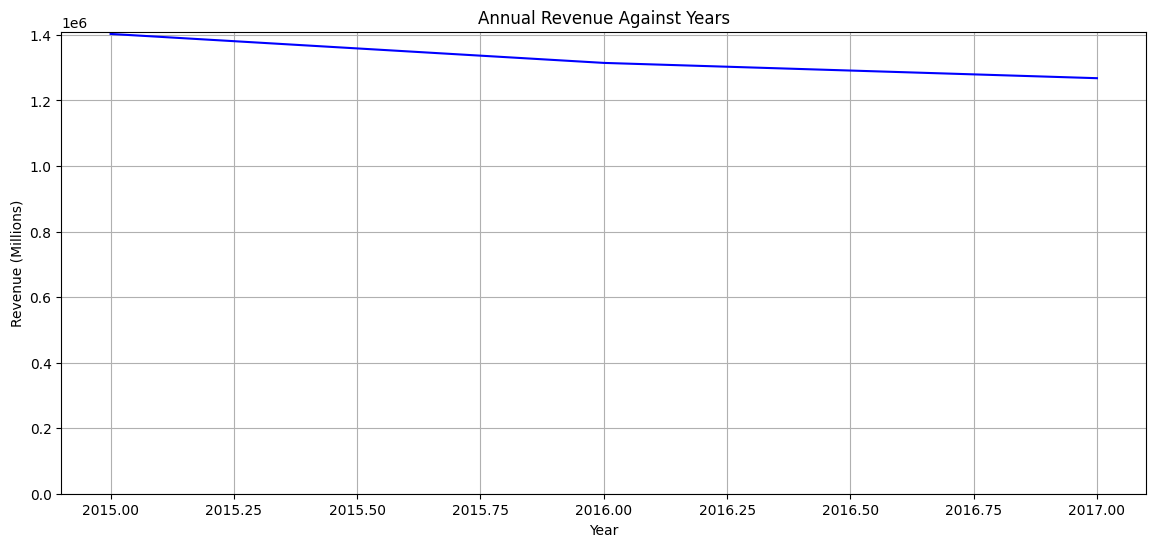

In [11]:
annual_revenue.plot(kind='line', figsize=(14, 6), color='blue')
plt.title('Annual Revenue Against Years')
plt.xlabel('Year')
plt.ylabel('Revenue (Millions)')
plt.grid(True)
plt.ylim(bottom=0)
plt.show()

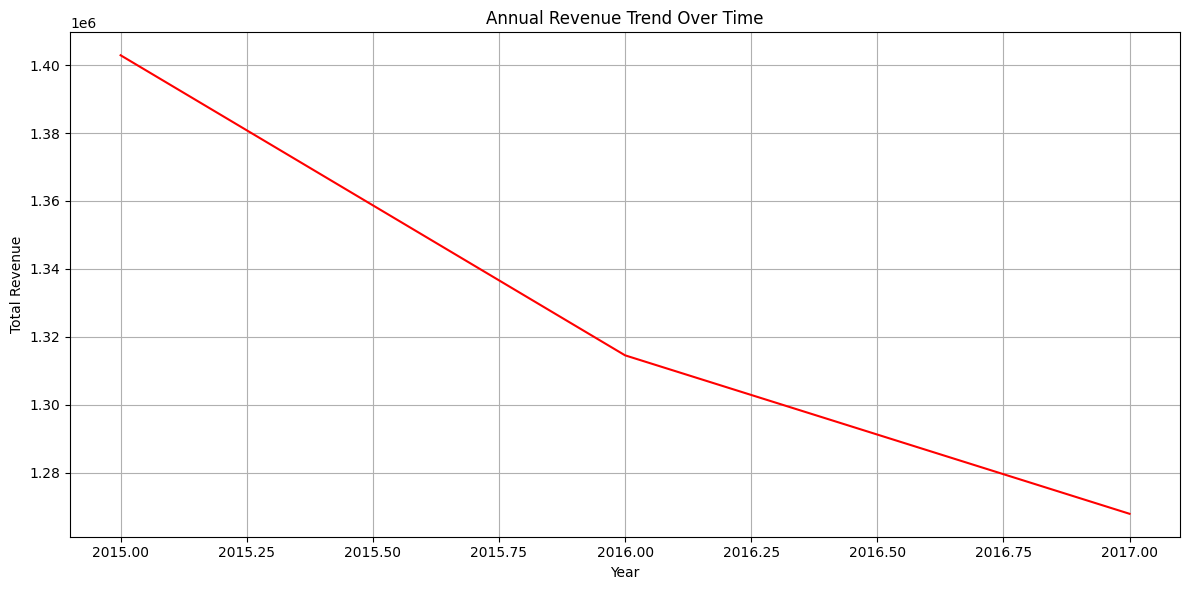

In [15]:
# Zoomed in plot
annual_revenue.plot(kind='line', figsize=(12, 6), color='red')
plt.title('Annual Revenue Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

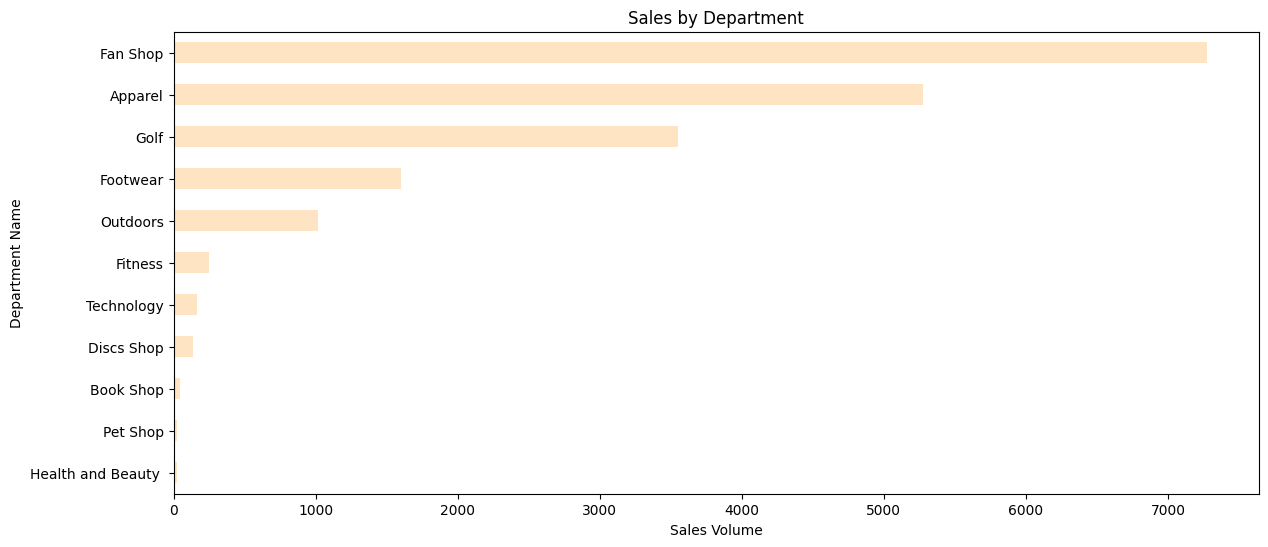

In [18]:
df['Department Name'].value_counts().sort_values(ascending=True).plot(kind='barh', title='Sales by Department', color='bisque')
plt.rcParams['figure.figsize'] = (14, 6)
plt.xlabel('Sales Volume')
plt.show()

In [1]:
region_counts = df['Region'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, startangle=90, autopct="%.1f%%", colors = sns.color_palette("Set3"))
plt.title('Order Distribution by Market')
plt.show()

NameError: name 'df' is not defined

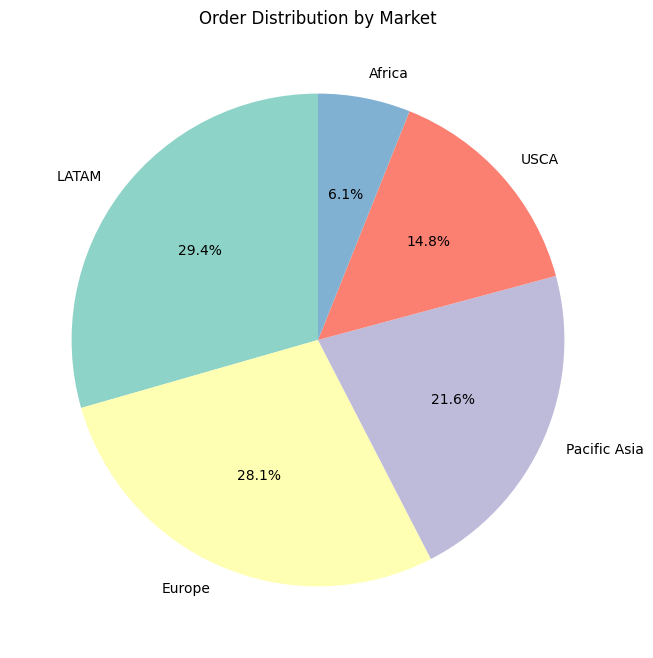

In [17]:
market_counts = df['Market'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, startangle=90, autopct="%.1f%%", colors = sns.color_palette("Set3"))
plt.title('Order Distribution by Market')
plt.show()

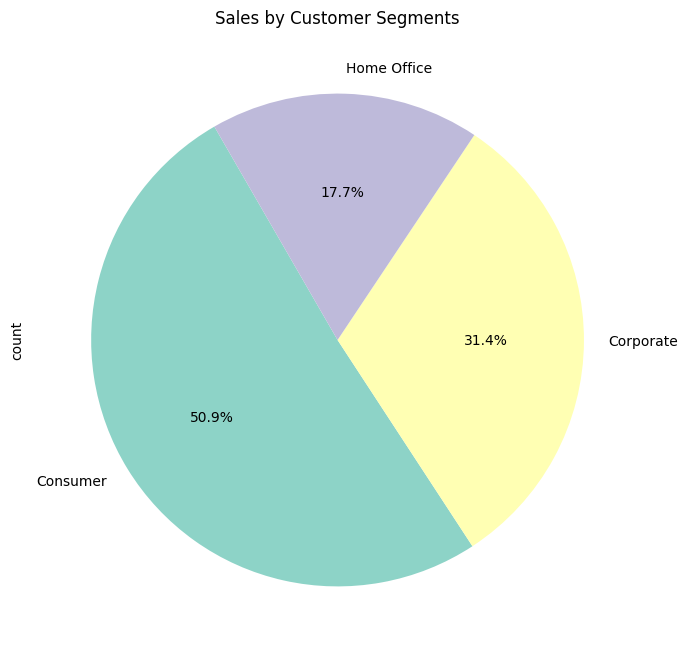

In [5]:
df['Customer Segment'].value_counts().sort_index().plot(kind='pie', title='Sales by Customer Segments', autopct='%1.1f%%', startangle=120, figsize=(8, 8), colors = sns.color_palette("Set3"))
plt.rcParams['figure.figsize'] = (14, 6)
plt.show()